In [43]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
import plotly.tools as tls
import warnings
import plotly.graph_objs as go
from plotly import tools
warnings.filterwarnings("ignore")

In [44]:
data = pd.read_csv('/content/german_credit_dataset.csv')
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,skilled,own,NaN,little,1169,6,radio/TV,good
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled and resident,own,little,NaN,2096,12,education,good
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled,free,little,little,4870,24,car,bad


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


In [46]:
data.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

###Set up color

In [47]:
pal = ['#DDFFBC','#57CC99','#91C788','#184D47', '#1C1427']

In [48]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

###Function for EDA

In [49]:
data['risk'] = data['Risk'].apply(lambda x: 1 if x=='good' else 0)

In [50]:
def countplot(label, dataset):
    plt.figure(figsize=(8,6))
    Y = data[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset, palette=pal[2:4])
    for p in ax.patches:
        ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x()+0.3, p.get_height()+50), fontsize=12)
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    ax.set_yticklabels(map('{:.2f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.set_xlabel(label, fontsize=16)
    plt.show()

In [51]:
def risk_count(col, target, a, b):
    result = pd.pivot_table(data, values=target, index=col, columns='risk', aggfunc=len)
    ax = result.div(result.sum(0), axis=1)
    ax = ax.plot(kind='bar', figsize=(a,b), width=0.7, edgecolor=None, color=pal[2:4])
    plt.title("Good/Bad Rate by {col}".format(col=col), loc="right", fontsize=12)
    plt.legend(labels=["Bad","Good"], fontsize=14)
    plt.xticks(fontsize=12, rotation=40)
    plt.xlabel("Job").set_visible(False)

    for spine in plt.gca().spines.values():
        spine.set_visible(False)
        plt.yticks([])
    
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate('{:.1%}'.format(height), (x, y + height + 0.02))

In [52]:
def risk_stacked(col, target, a, b):
    result = pd.pivot_table(data, values=target, index=col, columns='risk', aggfunc=len)
    ax = result.div(result.sum(1), axis=0)
    ax = ax.plot(kind='barh', stacked=True, figsize=[a,b], color=pal[0:2])
    plt.title("Good/Bad Rate by {col}".format(col=col), loc="center", fontsize=16)
    plt.legend(labels=["Bad","Good"], fontsize=12, loc='upper center')
    plt.yticks(fontsize=12)
    plt.ylabel("Job").set_visible(False)
    
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
        plt.xticks([])

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate('{:.1%}'.format(width),(x+0.025,y+0.15))

#Exploratory data analysis 

###Good/Bad Rate

In [53]:
data["Risk"].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

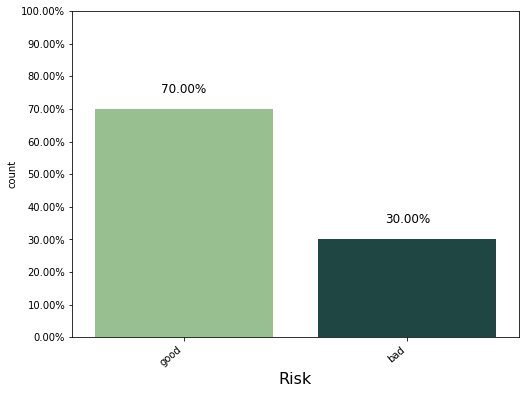

In [54]:
countplot("Risk", data)

In [55]:
# Divide feature
cat_col = [col for col in data.columns if data[col].dtypes=='object']
num_col = [col for col in data.columns if data[col].dtypes!='object']
print('The number of categorical columns:',len(cat_col))
print('The number of numeric columns:',len(num_col))

The number of categorical columns: 7
The number of numeric columns: 4


In [56]:
# Checking categorical columns
for i in cat_col:
  print(color.BOLD + "Column: " + i + color.END)
  print(data[i].value_counts())
  print('\n')

Column: Sex
male      690
female    310
Name: Sex, dtype: int64


Column: Job
skilled                       630
unskilled and resident        200
highly skilled                148
unskilled and non-resident     22
Name: Job, dtype: int64


Column: Housing
own     713
rent    179
free    108
Name: Housing, dtype: int64


Column: Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64


Column: Checking account
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


Column: Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64


Column: Risk
good    700
bad     300
Name: Risk, dtype: int64




#Categorical columns

#Sex

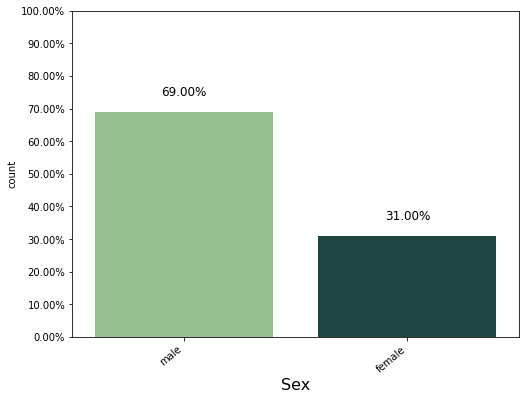

In [57]:
countplot("Sex", data)

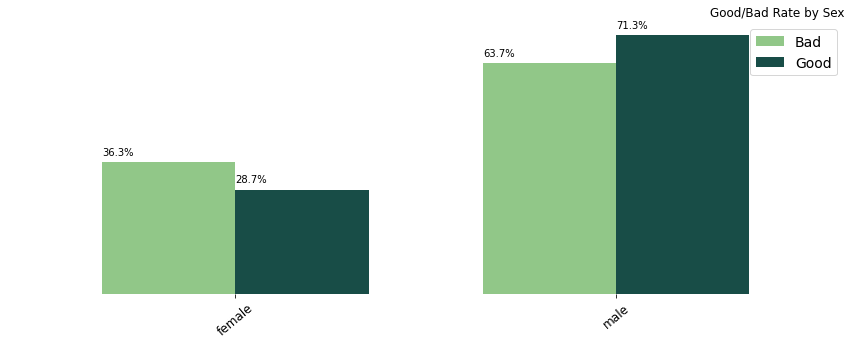

In [58]:
risk_count("Sex", "Risk",15,5)

###Job

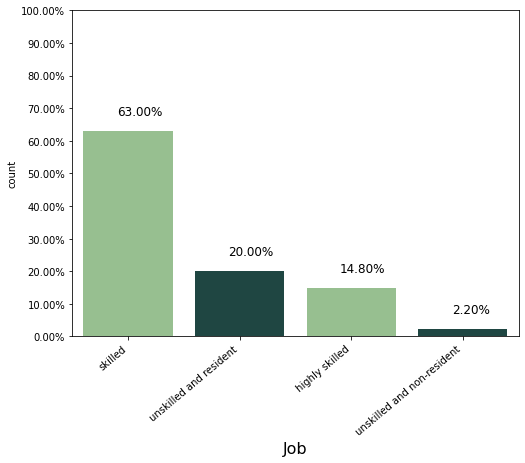

In [59]:
countplot("Job", data)

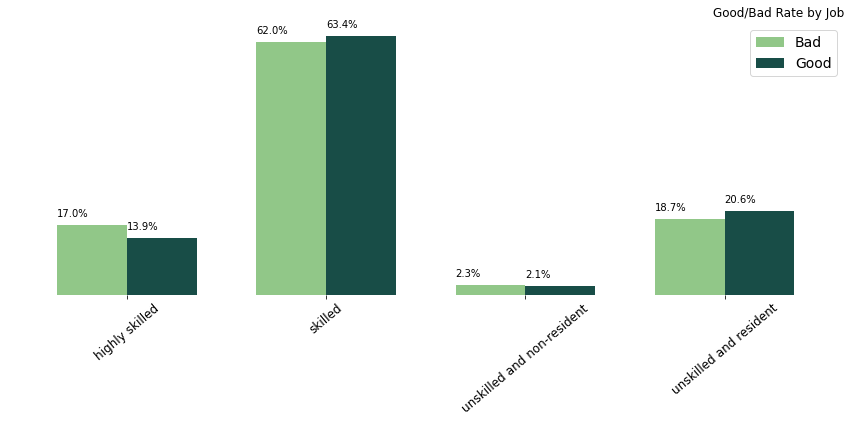

In [60]:
risk_count("Job", "Risk",15,5)

###Housing

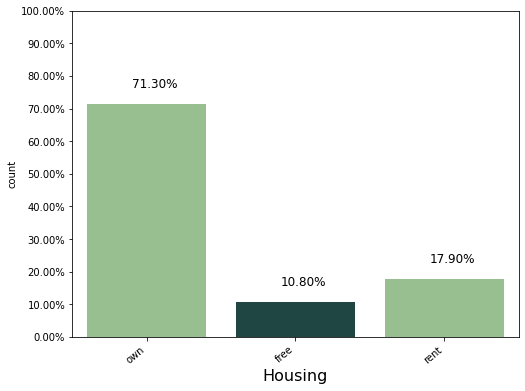

In [61]:
countplot("Housing", data)

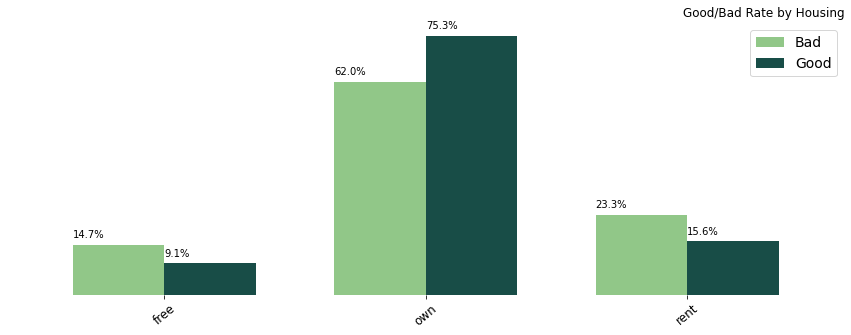

In [62]:
risk_count("Housing", "Risk",15,5)

###Saving account

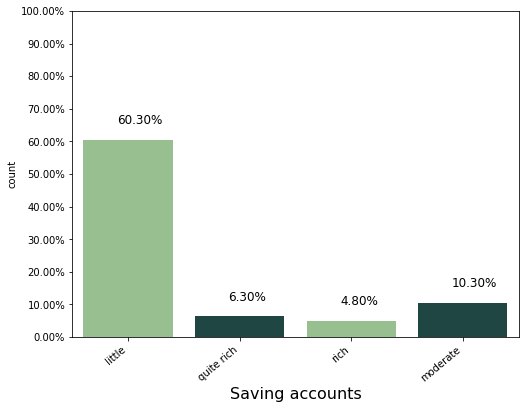

In [63]:
countplot("Saving accounts", data)

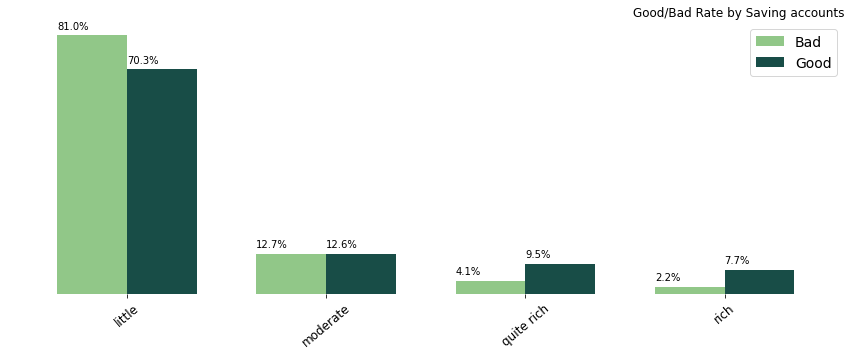

In [64]:
risk_count("Saving accounts", "Risk",15,5)

###Checking account

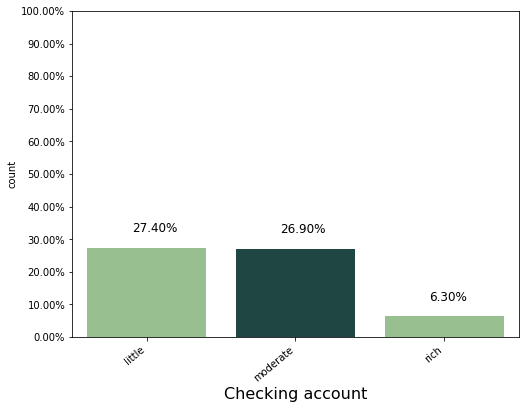

In [65]:
countplot("Checking account", data)

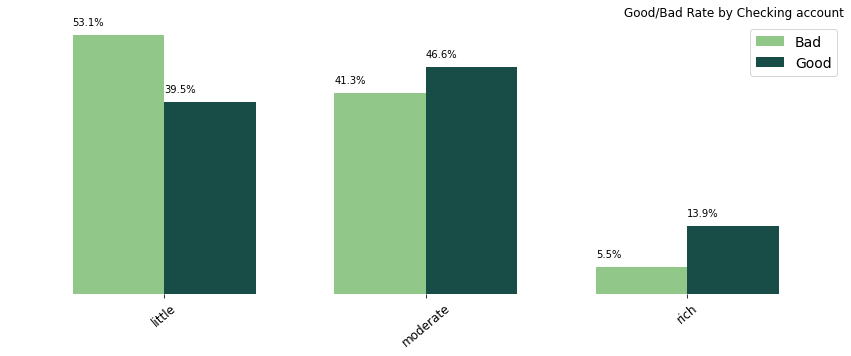

In [66]:
risk_count("Checking account", "Risk",15,5)

###Purpose

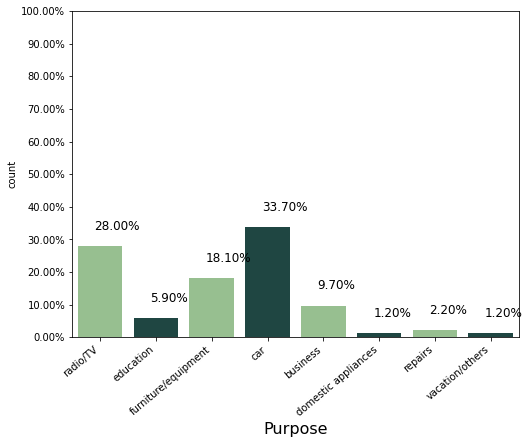

In [67]:
countplot("Purpose", data)

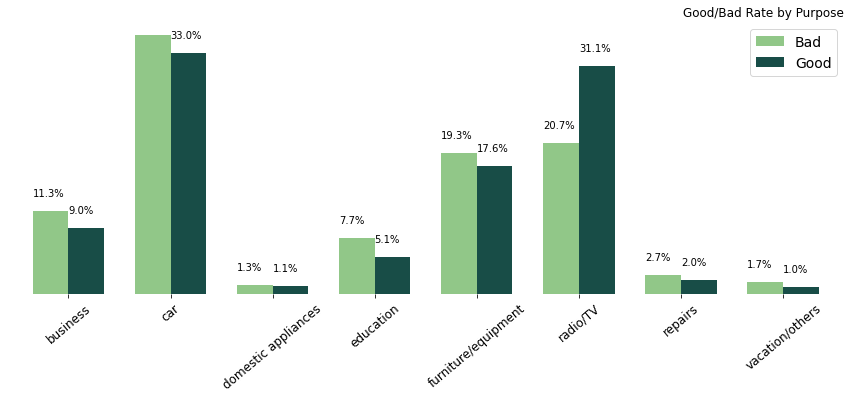

In [68]:
risk_count("Purpose", "Risk",15,5)

#Numeric columns

###Age

In [69]:
print('Max age: ', data['Age'].max())
print('Min age: ', data['Age'].min())
print('Null Values: ', data['Age'].isnull().any())

Min age:  75
Max age:  19
Null Values:  False


In [70]:
df_good = data.loc[data["Risk"] == 'good']['Age'].values.tolist()
df_bad = data.loc[data["Risk"] == 'bad']['Age'].values.tolist()
df_age = data['Age'].values.tolist()
#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)
#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [71]:
data['Age_group'] = pd.cut(data['Age'],[19,23,41,61,76],labels = ['Students','Adult', 'Midle-age', 'Elderly'])

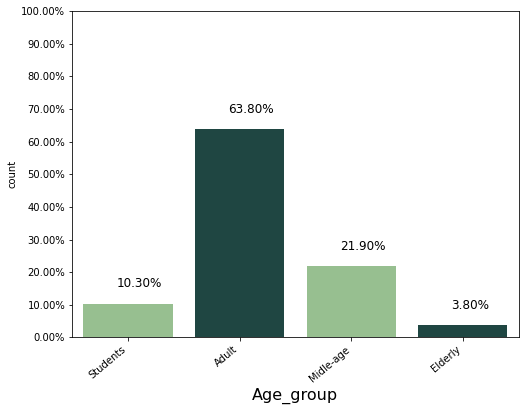

In [72]:
countplot("Age_group", data)

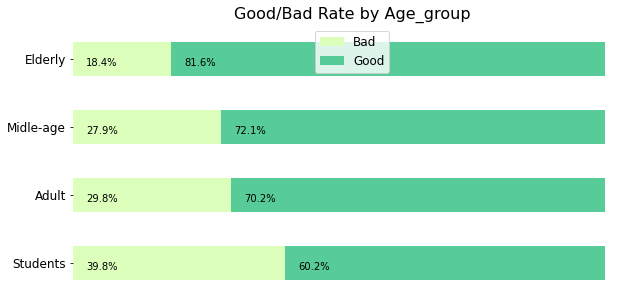

In [73]:
risk_stacked('Age_group','Risk',10,5)

##Credit amount

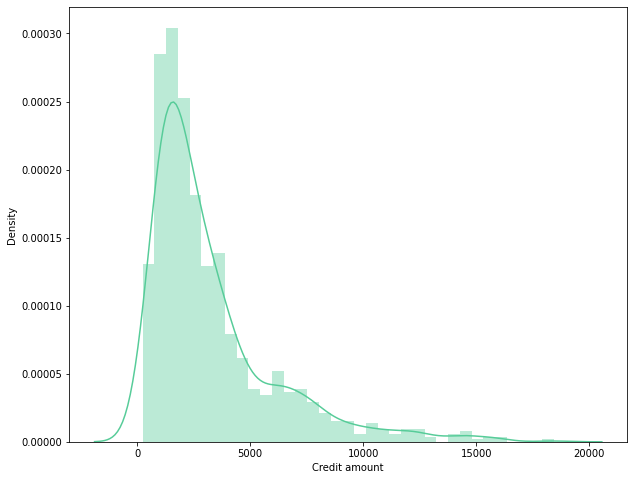

In [74]:
plt.figure(figsize=(10,8))
sns.distplot(data["Credit amount"], color=pal[1])
plt.show()

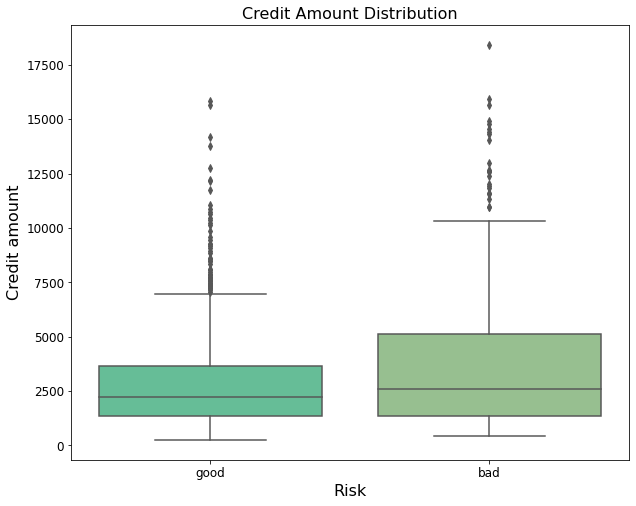

In [75]:
fig, ax1 = plt.subplots(figsize = (10, 8))
sns.boxplot(x = 'Risk', y = 'Credit amount', data = data, orient = 'v', ax = ax1, palette=pal[1:3])
ax1.set_xlabel('Risk', fontsize=16)
ax1.set_ylabel('Credit amount', fontsize=16)
ax1.set_title('Credit Amount Distribution', fontsize=16)
ax1.tick_params(labelsize=12)

###Duration

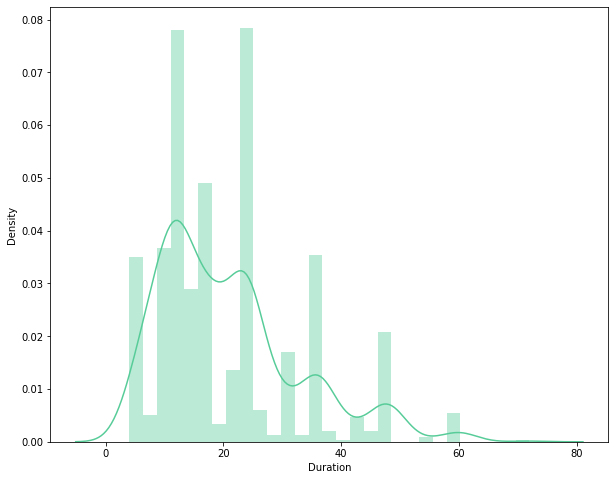

In [76]:
plt.figure(figsize=(10,8))
sns.distplot(data["Duration"], color=pal[1])
plt.show()

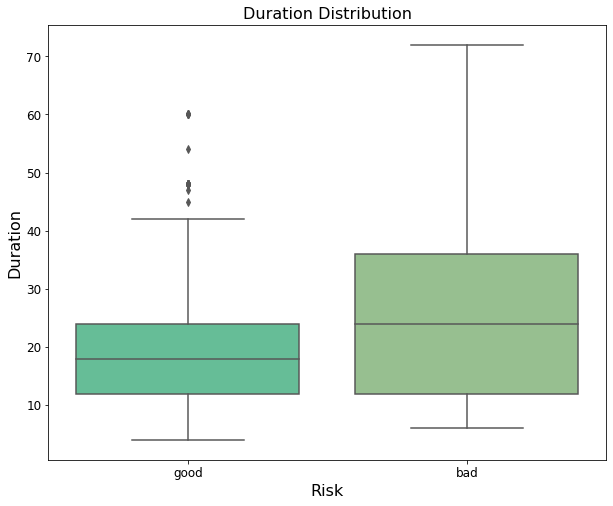

In [77]:
fig, ax1 = plt.subplots(figsize = (10, 8))
sns.boxplot(x = 'Risk', y = 'Duration', data = data, orient = 'v', ax = ax1, palette=pal[1:3])
ax1.set_xlabel('Risk', fontsize = 16)
ax1.set_ylabel('Duration', fontsize=16)
ax1.set_title('Duration Distribution', fontsize=16)
ax1.tick_params(labelsize=12)

###Good/Bad rate by age and sex

In [78]:
age_sex = data.groupby(['Age_group','Sex'])['risk'].sum().unstack()
age_sex

Sex,female,male
Age_group,,
Students,36,26
Adult,116,332
Midle-age,39,119
Elderly,9,22


In [79]:
age_sex_rate = age_sex.div(data.groupby(['Age_group','Sex'])['risk'].count().unstack(),axis=0)
age_sex_rate 

Sex,female,male
Age_group,,
Students,0.610169,0.590909
Adult,0.617021,0.737778
Midle-age,0.764706,0.708333
Elderly,0.900000,0.785714


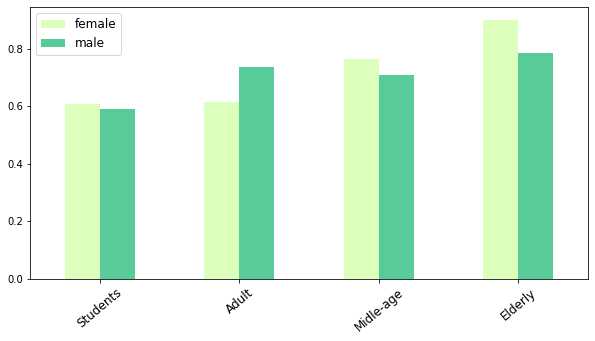

In [80]:
ax = age_sex_rate.plot(kind='bar', figsize=(10,5), color=pal[::1])
plt.legend(fontsize=12)
plt.xlabel("Age").set_visible(False)
plt.xticks(fontsize=12, rotation=40)
plt.show()

###Housing and purpose 

In [81]:
house_pur = data.groupby(['Purpose','Housing'])['risk'].sum().unstack()
house_pur

Housing,free,own,rent
Purpose,,,
business,2.0,56.0,5.0
car,32.0,159.0,40.0
domestic appliances,NaN,7.0,1.0
education,8.0,22.0,6.0
furniture/equipment,8.0,86.0,29.0
radio/TV,10.0,181.0,27.0
repairs,1.0,12.0,1.0
vacation/others,3.0,4.0,NaN


###Good/Bad rate by age and job

In [82]:
age_job = data.groupby(['Age_group','Job'])['risk'].sum().unstack()
age_job

Job,highly skilled,skilled,unskilled and non-resident,unskilled and resident
Age_group,,,,
Students,2,45,2,13
Adult,68,292,7,81
Midle-age,20,93,1,44
Elderly,7,14,5,5


In [83]:
age_job_rate = age_job.div(data.groupby(['Age_group','Job'])['risk'].count().unstack(),axis=0)
age_job_rate 

Job,highly skilled,skilled,unskilled and non-resident,unskilled and resident
Age_group,,,,
Students,0.666667,0.592105,0.666667,0.619048
Adult,0.680000,0.717445,0.583333,0.680672
Midle-age,0.571429,0.720930,0.500000,0.830189
Elderly,0.700000,0.823529,1.000000,0.833333


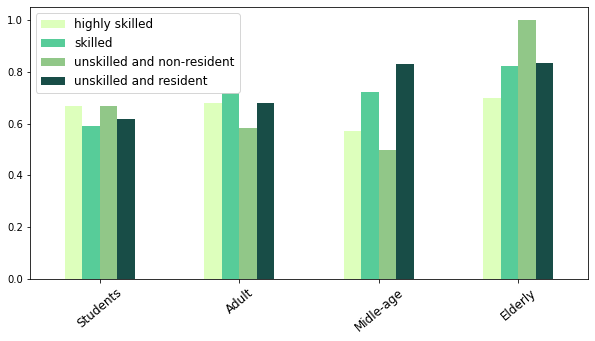

In [84]:
ax = age_job_rate.plot(kind='bar', figsize=(10,5), color=pal[::1])
plt.legend(fontsize=12)
plt.xlabel("Age").set_visible(False)
plt.xticks(fontsize=12, rotation=40)
plt.show()